In [1]:
# !pip install statsmodels

In [1]:
import pandas as pd

data = {'x' : [1, 2, 3, 4, 5,], 'y' : [1, 3, 4, 6, 5]}
df = pd.DataFrame(data)
df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


### 가설 및 결과 : statsmodels.formula.api

In [2]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula = 'y~x', data=df).fit()
# lm = linear regressison
# statsmodels.formula.api 의 ols(Ordinary Least Squares, 선형회기분석) 기법 사용
# formula = 'y~x' : y = ax + b라는 의미를 내포하고 있음
# fit() : 훈련해라

In [3]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


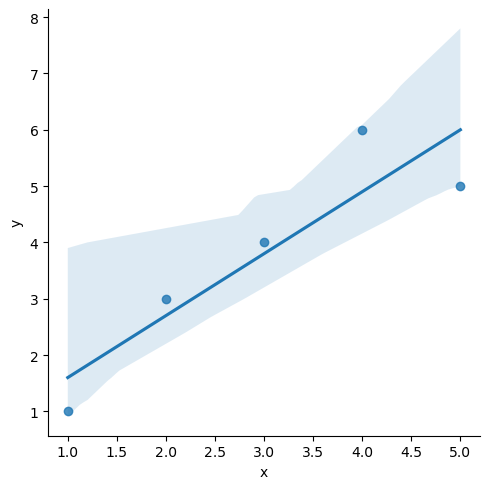

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='x', y='y', data = df)

### 잔차평가 residue : .resid
- 잔차 : 만든 모델과 실제값과의 차이
- 잔차는 평균이 0인 정규분포를 따라야 함 -> 회귀한다는 의미
- 잔차 평가 : 잔차의 평균이 0이고 정규분포를 따르는지 확인

In [6]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

### 잔차 분포도

<Axes: ylabel='Count'>

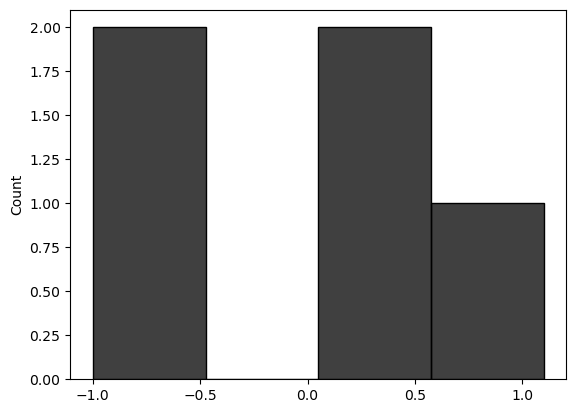

In [8]:
sns.histplot(resid, color='black')

### 결정계수(R-Squared)
- 회귀모델에서 예측값이 참값을 얼마만큼 설명해주는지를 가르키는 지표, 회귀모델의 성과 지표
- 1에 가까울 수록 좋은 회귀 모델, 0에 가까울 수록 나쁜 모델 

In [10]:
import numpy as np

mu = np.mean(df.y)
y = df.y
yhat = lm_model.predict()
np.sum((yhat - mu)**2) / np.sum((y-mu)**2)

0.8175675675675674

In [11]:
lm_model.rsquared

0.8175675675675675